# Assignment to do:
* Track evolution of 6Msolar star
* Recreate Figs 8.1 (HRD logL vs logTeff), 8.2 (logR vs logTeff), 8.3 (logT vs logRho), 8.5 (logX vs mr for MS, RGB, He burning)
* Make marks on figures to show points of evolution

## Initialize session

In [2]:
%pylab 
from nugridpy import nugridse as mp
from nugridpy import mesa as ms

data_dir="/data/nugrid_apod2/"    

ms.set_nugrid_path(data_dir)
mp.set_nugrid_path(data_dir)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


## The MESA stellar evolution model
Initialise the Mstar solar-mass Z=Zstar MESA stellar evolution model from set1.2 using the seeker method:

In [34]:
Mstar = 6.0
Zstar = 0.02

s=ms.star_log(mass=Mstar,Z=Zstar)

nugrid_path = /data/nugrid_apod2/
closest set is set1.2 (Z = 0.02)
closest mass is 6.0
Using old star.logsa file ...
 reading ...100% 

Closing star.log  tool ...


What's happening at the centre of the star? ...

# logTc vs log$\rho_{c}$ (Fig 8.3)

<IPython.core.display.Javascript object>


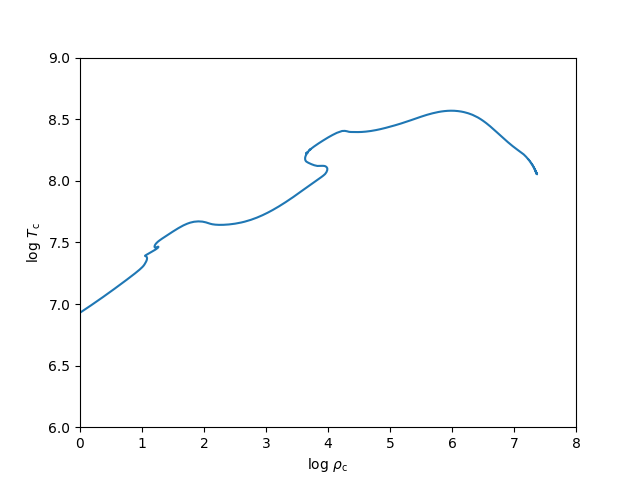

[0, 8, 6, 9]

In [90]:
ifig=101;close(ifig);figure(ifig)
s.tcrhoc()
axis([0,8,6,9])

... and at the surface?

In [37]:
#Quantities we can plot against each other
s.cols

{'TP_state': 145,
 'burn_c': 139,
 'burn_n': 140,
 'burn_o': 141,
 'burn_qtop_1': 65,
 'burn_qtop_10': 83,
 'burn_qtop_11': 85,
 'burn_qtop_12': 87,
 'burn_qtop_13': 89,
 'burn_qtop_14': 91,
 'burn_qtop_15': 93,
 'burn_qtop_16': 95,
 'burn_qtop_17': 97,
 'burn_qtop_18': 99,
 'burn_qtop_19': 101,
 'burn_qtop_2': 67,
 'burn_qtop_20': 103,
 'burn_qtop_3': 69,
 'burn_qtop_4': 71,
 'burn_qtop_5': 73,
 'burn_qtop_6': 75,
 'burn_qtop_7': 77,
 'burn_qtop_8': 79,
 'burn_qtop_9': 81,
 'burn_type_1': 64,
 'burn_type_10': 82,
 'burn_type_11': 84,
 'burn_type_12': 86,
 'burn_type_13': 88,
 'burn_type_14': 90,
 'burn_type_15': 92,
 'burn_type_16': 94,
 'burn_type_17': 96,
 'burn_type_18': 98,
 'burn_type_19': 100,
 'burn_type_2': 66,
 'burn_type_20': 102,
 'burn_type_3': 68,
 'burn_type_4': 70,
 'burn_type_5': 72,
 'burn_type_6': 74,
 'burn_type_7': 76,
 'burn_type_8': 78,
 'burn_type_9': 80,
 'center_c12': 130,
 'center_h1': 128,
 'center_he4': 129,
 'center_mu': 126,
 'center_o16': 131,
 'center_y

<IPython.core.display.Javascript object>


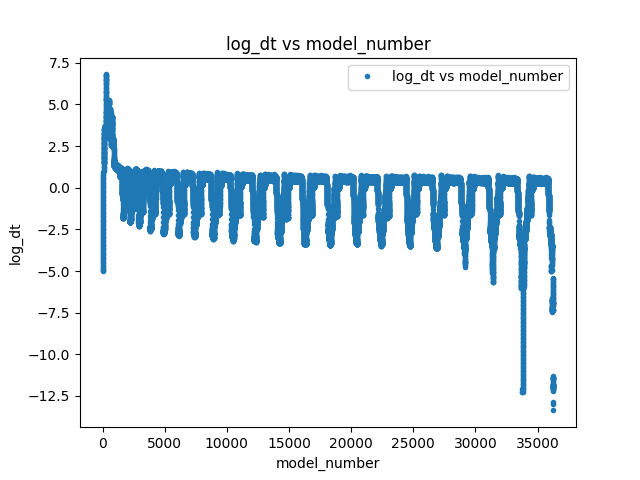

In [92]:
ifig=112;close(ifig);figure(ifig)
s.plot('model_number','log_dt')

# logTeff vs Model Number (for reference to obtain evolutionary markers)

<IPython.core.display.Javascript object>


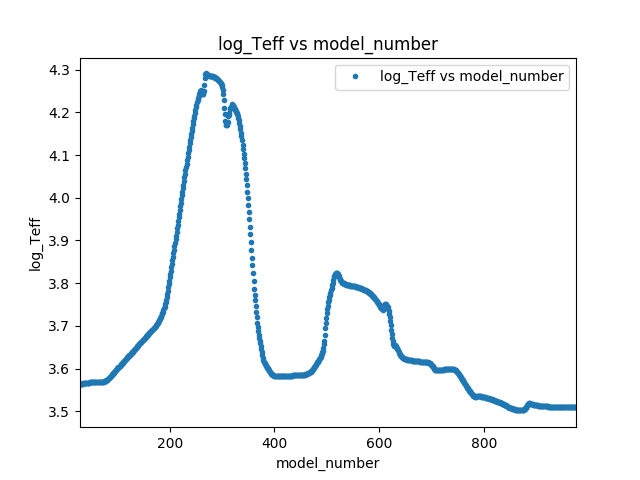

(0, 5000)

In [91]:
ifig=112;close(ifig);figure(ifig)
s.plot('model_number','log_Teff')
ylim(3.25,4.35)
xlim(0,5000)

# logL vs logTeff (Fig 8.1)

<IPython.core.display.Javascript object>


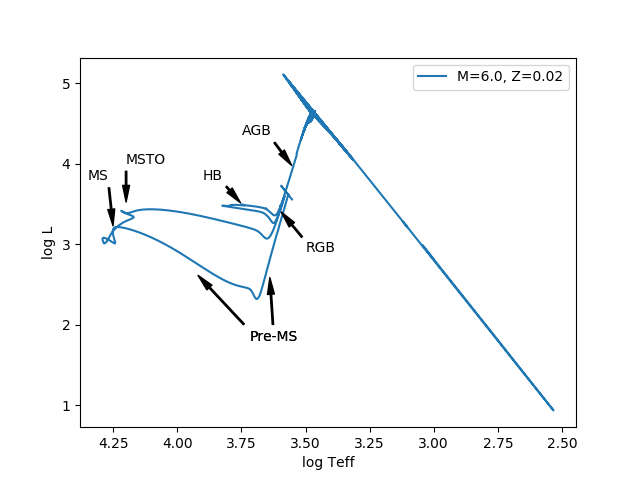

In [93]:
ifig=102;close(ifig);figure(ifig)
s.hrd_new()
annotate('MS', xy=(4.25, 3.2), xytext=(4.35, 3.8),
            arrowprops=dict(facecolor='black', shrink=0.05,width=1, headwidth=5),
            )
annotate('MSTO', xy=(4.2, 3.5), xytext=(4.2, 4.0),
            arrowprops=dict(facecolor='black', shrink=0.05,width=1, headwidth=5),
            )
annotate('RGB', xy=(3.6, 3.42), xytext=(3.5, 2.9),
            arrowprops=dict(facecolor='black', shrink=0.05,width=1, headwidth=5),
            )
annotate('HB', xy=(3.75, 3.5), xytext=(3.9, 3.8),
            arrowprops=dict(facecolor='black', shrink=0.05,width=1, headwidth=5),
            )
annotate('AGB', xy=(3.55, 3.96), xytext=(3.75, 4.35),
            arrowprops=dict(facecolor='black', shrink=0.05,width=1, headwidth=5),
            )
annotate('Pre-MS', xy=(3.64, 2.62), xytext=(3.72, 1.8),
            arrowprops=dict(facecolor='black', shrink=0.05,width=1, headwidth=5),
            )
annotate('Pre-MS', xy=(3.93, 2.65), xytext=(3.72, 1.8),
            arrowprops=dict(facecolor='black', shrink=0.05,width=1, headwidth=5),
            )

## Evolution Markers
* Main Sequence occurs at the far left of the diagram (highest Teff), beginning at the hottest point (modelnum=270) and ending at the turnoff point (next peak, small loop before evolutionary line to RGB, modelnum=318)
* RGB is the vertical line after horizontal evolutionary line from MS, with ~constant T over a longer timescale than around it. (modelnum in ~400-450 range)
* He-burning in the core occurs at horizontal branch, which begins at the next Teff peak coming off the RGB. (modelnum in ~520-600 range)

### Modelnums are assigned as follows:
* Main Sequence: 300
* RGB: 425
* He-burning core: 560

# logR vs logTeff (Fig 8.2)

<IPython.core.display.Javascript object>


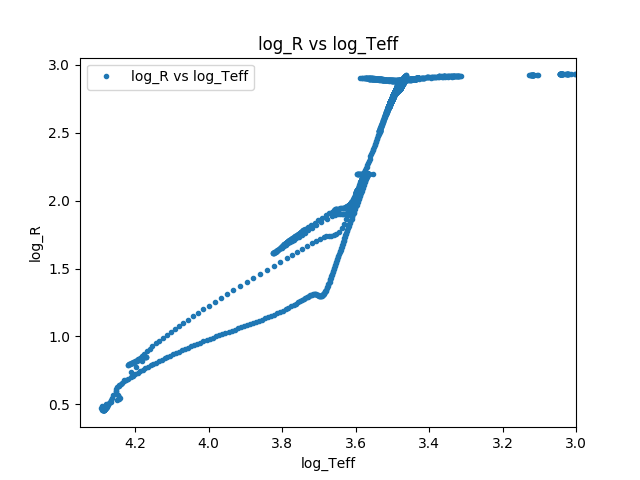

(4.35, 3.0)

In [49]:
ifig=102;close(ifig);figure(ifig)
s.plot('log_Teff','log_R')
xlim(4.35,3.00)

Now that we have an overview of the stellar evolution of this Mstar$M_\odot$ star let's have a closer look at the nucleosynthesis.

## The NuGrid post-processing model
Initialise the Mstar solar-mass Z=Zstar NuGrid nucleosynthesis data from set1.2 using the seeker method:

In [85]:
MSmodelnum = 300
RGBmodelnum = 425
Heburnmodelnum = 560

pt=mp.se(mass=Mstar,Z=Zstar)

nugrid_path = /data/nugrid_apod2/
closest set is set1.2 (Z = 0.02)
closest mass is 6.0
Searching files, please wait.......
Reading preprocessor files
File search complete.
Closing plot_tools


# Abundance Profile for Main Sequence of 6$M_{\odot}$ Star
### Notes:
* H-burning core marked by sharp change in abundances (lower H, higher He) at ~1.6$M_{\odot}$

<IPython.core.display.Javascript object>


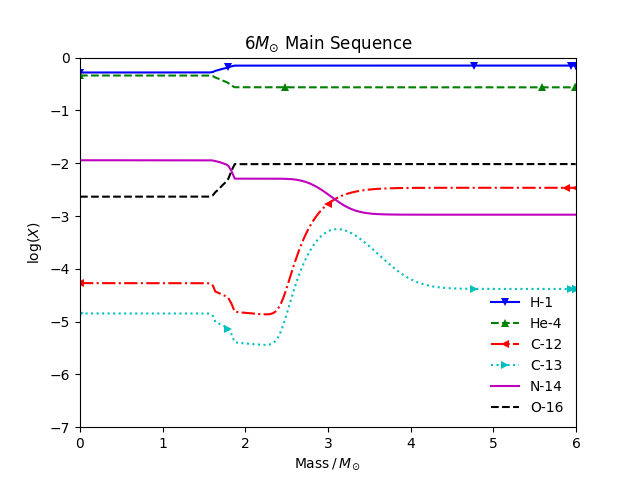

 reading ['iso_massf']...100%

In [80]:
species=['H-1','He-4','C-12','C-13','N-14','O-16','N-22']
ifig=108;close(ifig);figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=MSmodelnum, logy=True)
ylim(-7,0)
xlim(0.0,6.0)
title('6$M_{\odot}$ Main Sequence')

# Abundance Profile for RGB of 6$M_{\odot}$ Star
### Notes:
* He core visible by complete dropoff of H at ~0.87$M_{\odot}$
* Furthest extent of convective envelope marked by the discontinuity at ~1.3$M_{\odot}$ as everything above that is well mixed
* Slow decrease of H and increase of He between these two points indicates the presence of the H-burning shell, which appears to be at least partially reached by convective layer (otherwise would not have discontinuity before flattening)

<IPython.core.display.Javascript object>


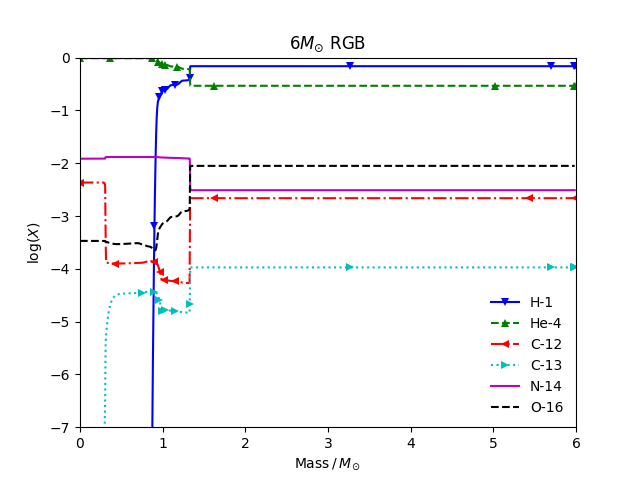

 reading ['iso_massf']...100%

In [86]:
species=['H-1','He-4','C-12','C-13','N-14','O-16','N-22']
ifig=108;close(ifig);figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=RGBmodelnum, logy=True)
ylim(-7,0)
xlim(0.0,6.0)
title('6$M_{\odot}$ RGB')

# Abundance Profile for He-burning Core of 6$M_{\odot}$ Star
### Notes:
* He-burning core visible starting at ~0.54$M_{\odot}$ due to sharp decrease in He and increase in C and O
* Thin H-burning shell visible between ~1.35-1.45$M_{\odot}$
* Non-burning layer of He in between?

<IPython.core.display.Javascript object>


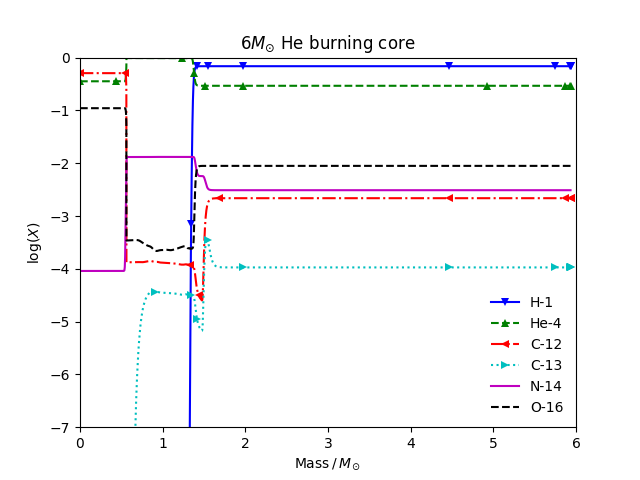

 reading ['iso_massf']...100%

In [87]:
species=['H-1','He-4','C-12','C-13','N-14','O-16','N-22']
ifig=108;close(ifig);figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=Heburnmodelnum, logy=True)
ylim(-7,0)
xlim(0.0,6.0)
title('6$M_{\odot}$ He burning core')